In [1]:
# importar una librería
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd
filename = '/content/drive/MyDrive/CodingDojo/Data/sales_predictions.csv'
df = pd.read_csv(filename)


In [3]:
df.head(4)
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
# eliminamos 526 registros de un total 8523, con Item_Visibility = 0, el resto de los datos está correcto
df = df.loc[df['Item_Visibility']!= 0]
df.count()


Item_Identifier              7997
Item_Weight                  6624
Item_Fat_Content             7997
Item_Visibility              7997
Item_Type                    7997
Item_MRP                     7997
Outlet_Identifier            7997
Outlet_Establishment_Year    7997
Outlet_Size                  5731
Outlet_Location_Type         7997
Outlet_Type                  7997
Item_Outlet_Sales            7997
dtype: int64

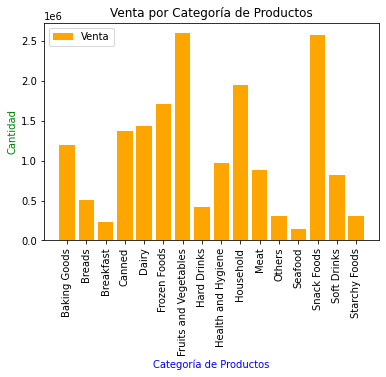

In [31]:
#Top 10 de ventas Item_Outlet_Sales

#empresa

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors


aa = df.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum()

xx = aa.index.tolist()
yy =  list(aa['Item_Outlet_Sales'])

fig, ax = plt.subplots()
ax.bar(xx, yy, color="orange", label="Venta")
ax.title.set_text('Venta por Categoría de Productos')
ax.set_xlabel('Categoría de Productos', color = 'b') 
ax.set_ylabel('Cantidad', color = 'g') 
plt.xticks(rotation=90)
leg = ax.legend()

plt.show()



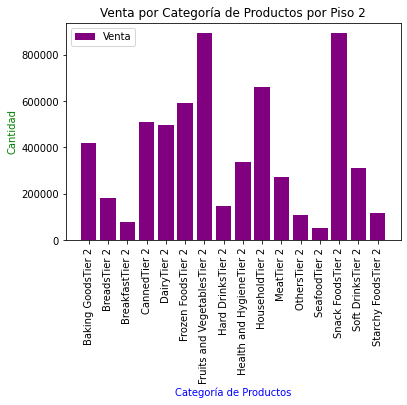

In [41]:



def evaluaData(s):
  lista = []

  for x in s:
    lista.append(''.join(x))

  return lista 
   

dfaux = df.loc[df['Outlet_Location_Type']== 'Tier 2']

aa = dfaux.groupby(['Item_Type','Outlet_Location_Type'])[['Item_Outlet_Sales']].sum()




xx = evaluaData(list(aa.index.tolist()))
yy =  list(aa['Item_Outlet_Sales'])

fig, ax = plt.subplots()
ax.bar(xx, yy, color="purple", label="Venta")
ax.title.set_text('Venta por Categoría de Productos por Piso 2')
ax.set_xlabel('Categoría de Productos', color = 'b') 
ax.set_ylabel('Cantidad', color = 'g') 
plt.xticks(rotation=90)
leg = ax.legend()

plt.show()



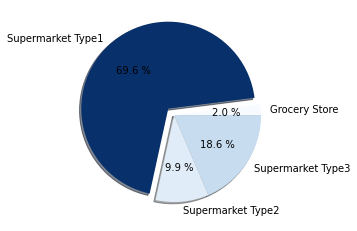

In [53]:


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

def evaluaData(s):
  lista = []

  for x in s:
    lista.append(''.join(x))

  return lista 
   


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

aa = df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].sum()

xx = evaluaData(list(aa.index.tolist()))
#xx = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
yy =  list(aa['Item_Outlet_Sales'])

yy




import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

AtriporDepto = yy
Departamentos = xx

normdata = colors.Normalize(min(AtriporDepto), max(AtriporDepto))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(AtriporDepto))
desfase = (0, 0.1, 0, 0)

plt.pie(AtriporDepto, labels=Departamentos, autopct="%0.1f %%", colors=colores, explode=desfase, shadow=True)
plt.title="Venta por Departamento"
plt.show()
